# Sentiment Classification

Data Preprocessing

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\furka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the data and combine them
df_pos = pd.read_csv('data/reviews.pos' , delimiter="\t", header=None,)
df_neg = pd.read_csv('data/reviews.neg', delimiter="\t", header=None)

df_neg['label'] = 'neg'
df_pos['label'] = 'pos'

df_pos = df_pos.sample(frac=0.1).reset_index(drop=True)

df = pd.concat([df_pos, df_neg], ignore_index=True)
df.to_csv('data/combined_reviews.csv', index=False, header=['review', 'label'])

In [3]:
data = pd.read_csv('data/combined_reviews.csv')
data = data.sample(frac=0.6).reset_index(drop=True)

In [4]:
data.head()

,review,label
0,ürün elime ulaştı beklentilerimin hiçbirini ka...,neg
1,yerli malı yurdun malı bunu herkes kullanmalı....,pos
2,"yorumlara bakarak ürünü aldım,çok kötü bir kağ...",neg
3,fotoğrafa yeni başladım. geliştiriyorum kendim...,pos
4,küçük çocukları olan aileler için evde bulunma...,pos


In [5]:
data['label'].value_counts()

label
pos    13128
neg     8984
Name: count, dtype: int64

In [6]:
# Function to clean the text
# split and print the punctiation, stopwords and the text

punctuation = string.punctuation
stopwords = stopwords.words('turkish')

print(punctuation)
print(stopwords)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [7]:
def clean_from_stopwords(data):
    cleaned_data = []
    for d in data:
        temp = ''
        for word in d.split():
            if word not in stopwords and not word.isnumeric():
                temp += word + ' '
        cleaned_data.append(temp.strip())
    return pd.Series(cleaned_data)

# Clean data from stopwords
data['review'] = clean_from_stopwords(data['review'])

In [8]:
data['review'][0:5]

0    ürün elime ulaştı beklentilerimin hiçbirini ka...
1    yerli malı yurdun malı bunu herkes kullanmalı....
2    yorumlara bakarak ürünü aldım,çok kötü bir kağ...
3    fotoğrafa yeni başladım. geliştiriyorum kendim...
4    küçük çocukları olan aileler evde bulunması ge...
Name: review, dtype: object

In [9]:
# Function to clean the text from punctuation
def clean_data_from_punctuation(data):
    cleaned_data = []
    for d in data:
        temp = ''
        for word in d:
            if word not in punctuation:
                temp += word
        cleaned_data.append(temp)
    return pd.Series(cleaned_data)

# Clean data from punctuation
data['review'] = clean_data_from_punctuation(data['review'])

In [10]:
data['review'][0:5]

0    ürün elime ulaştı beklentilerimin hiçbirini ka...
1    yerli malı yurdun malı bunu herkes kullanmalı ...
2    yorumlara bakarak ürünü aldımçok kötü bir kağı...
3    fotoğrafa yeni başladım geliştiriyorum kendimi...
4    küçük çocukları olan aileler evde bulunması ge...
Name: review, dtype: object

In [11]:
# save the cleaned data
data.to_csv('data/cleaned_reviews.csv', index=False)
data = pd.read_csv('data/cleaned_reviews.csv',sep=',',names=['review', 'label'])
print(data.head())

                                              review  label
0                                             review  label
1  ürün elime ulaştı beklentilerimin hiçbirini ka...    neg
2  yerli malı yurdun malı bunu herkes kullanmalı ...    pos
3  yorumlara bakarak ürünü aldımçok kötü bir kağı...    neg
4  fotoğrafa yeni başladım geliştiriyorum kendimi...    pos


Modeling

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['review'].values.astype('U'),
    data['label'].values.astype('U'),
    test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape)

(15479,) (6634,)


In [13]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(x_train)
print(X_train_count.shape)

(15479, 50420)


In [14]:
# TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
print(X_train_tfidf.shape)

(15479, 50420)


In [15]:
# Naive Bayes Classifier for Multinomial Models
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)
X_test_count = count_vectorizer.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_test_count)

In [16]:
# Predict the sentiment of the test data
y_pred = clf.predict(X_test_tfidf)
for review, sentiment in zip(x_test[:25], y_pred[:25]):
    print('%r => %s' % (review, sentiment))

'ürün kaliteli tek eksiği var isim yazma seçeneği yok olsaydı şık olurdu fiyatına göre mükemmel denebilir' => pos
'lezzeti dışarıda yapılan çoğu latte den güzel kısa sürede yapılabilmesi büyük kolaylık sağlıyor çoğu yerde satılmasa hepsiburadadan hızlıca temin etmek mümkün' => pos
'bence programlı olması güzelkolay kullanım kısa sürede türlü yemeği yapabiliyorsunuzçalışan bayanlara büyük kolaylıkfiyatı ucuz sayılmaztefal marka güvenle kullanabilirsiniz' => pos
'android market binlerce app yükleyebiliyorsunuz' => pos
'yorumlara bakarak aldım oyle çokta güzel degilhele kabartmalar cok amatörce olmus olmasa iyiymişyorumlara aldanmayın' => neg
'alışveriş sitesi yine beni yanıltmadı teşekkürler' => pos
'ürünü telefonda kullanamiyorum çalişmiyor' => pos
'kadar ihtiyaç duyulan bir ürünü kadar uygun fiyata kadar hızlı bir şekilde almak müthiş bir deneyim keşke alırken bir kaç tane alsaydım' => pos
'öncelikle hepsiburadaya teşekkür ederim hafta bitmeden telefonu bana ulaştırdığı için' => pos
'ö

Model Evaluation

In [17]:
# Results
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.7791679228218269


Confusion Matrix: [[   0    0    1]
 [   0 1371 1368]
 [   0   96 3798]]


              precision    recall  f1-score   support

       label       0.00      0.00      0.00         1
         neg       0.93      0.50      0.65      2739
         pos       0.74      0.98      0.84      3894

    accuracy                           0.78      6634
   macro avg       0.56      0.49      0.50      6634
weighted avg       0.82      0.78      0.76      6634



C:\Users\furka\.conda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\furka\.conda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\furka\.conda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


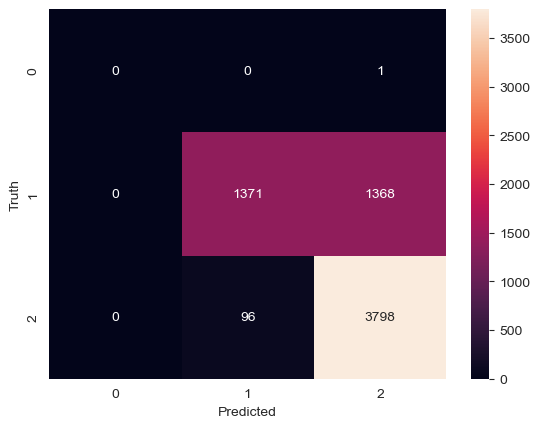

In [18]:
# Graph of results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [19]:
# Save the model
import joblib
joblib.dump(clf, 'model/sentiment_classification_model.pkl')
joblib.dump(count_vectorizer, 'model/count_vectorizer.pkl')
joblib.dump(tfidf_transformer, 'model/tfidf_transformer.pkl')

['model/tfidf_transformer.pkl']